<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/Oct_analysis_(DM)_pre_n_post_haemodialysis_VA%2CIOP%2CCCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn
import openpyxl

In [3]:
df = openpyxl.load_workbook('/content/drive/MyDrive/OCT analysis original dataset in hemodialysis patients thesis Dr Poojitha.xlsx')
df.sheetnames



['Patient-control demo (CKD-DM)',
 'Patient-control demo (CKD-HTN)',
 'Pre+post HD-VA,IOP,CCT-DM',
 'Pre+post HD-VA,IOP,CCT-HTN',
 'Pre+post HD-RNFL-DM',
 'Pre+post HD-CMT-DM',
 'Pre+post HD-VFA-DM',
 'Pre+post HD-RNFL-HTN',
 'Pre+post HD-CMT-HTN',
 'Pre+post HD-VFA-HTN']

In [5]:
visiondm = pd.read_excel('/content/drive/MyDrive/OCT analysis original dataset in hemodialysis patients thesis Dr Poojitha.xlsx', sheet_name='Pre+post HD-VA,IOP,CCT-DM')
visiondm.columns


Index(['Pre HD BCVA-DM', 'Denominator', 'Numerator', 'Logmar', 'Pre HD IOP-DM',
       'Pre HD CCT-DM', 'Post HD 1 wk BCVA-DM', 'Denominator.1', 'Numerator.1',
       'Logmar.1', 'Post HD 1 wk IOP-DM', 'Post HD 1 wk CCT-DM',
       'Post HD 4 wk BCVA-DM', 'Denominator.2', 'Numerator.2', 'Logmar.2',
       'Post HD 4 wk IOP-DM', 'Post HD 4 wk CCT-DM', 'BCVA-DM-Control',
       'Denominator.3', 'Numerator.3', 'Logmar.3', 'IOP-DM-Control',
       'CCT-DM-Control'],
      dtype='object')

In [19]:
vision_dm = visiondm.drop(['Denominator', 'Numerator',  'Pre HD IOP-DM',
       'Pre HD CCT-DM', 'Denominator.1', 'Numerator.1','Pre HD BCVA-DM',
        'Post HD 1 wk IOP-DM', 'Post HD 1 wk CCT-DM','Post HD 1 wk BCVA-DM',
        'Denominator.2', 'Numerator.2', 'Post HD 4 wk CCT-DM','Post HD 4 wk BCVA-DM',
       'Post HD 4 wk IOP-DM', 'Post HD 4 wk CCT-DM','BCVA-DM-Control',
       'Denominator.3', 'Numerator.3', 'IOP-DM-Control','Post HD 4 wk IOP-DM',
       'CCT-DM-Control'], axis=1)
vision_dm.columns

Index(['Logmar', 'Logmar.1', 'Logmar.2', 'Logmar.3'], dtype='object')

In [20]:
vision_dm.describe()

,Logmar,Logmar.1,Logmar.2,Logmar.3
count,30.000000,30.000000,30.000000,30.000000
mean,0.432890,0.427524,0.432460,0.228526
std,0.274321,0.179058,0.221809,0.188353
min,0.176091,0.176091,0.176091,0.000000
25%,0.176091,0.301030,0.207326,0.176091
50%,0.430000,0.477121,0.477121,0.176091
75%,0.477121,0.477121,0.477121,0.301030
max,1.301030,1.000000,1.000000,0.602060


In [21]:
vision_dm.corr()

,Logmar,Logmar.1,Logmar.2,Logmar.3
Logmar,1.000000,0.658337,0.935952,-0.115848
Logmar.1,0.658337,1.000000,0.580220,-0.181040
Logmar.2,0.935952,0.580220,1.000000,0.029104
Logmar.3,-0.115848,-0.181040,0.029104,1.000000


<Axes: >

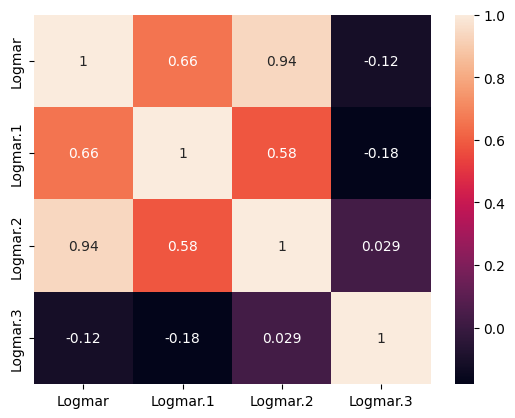

In [24]:
seaborn.heatmap(vision_dm.corr(), annot=True)

<Axes: >

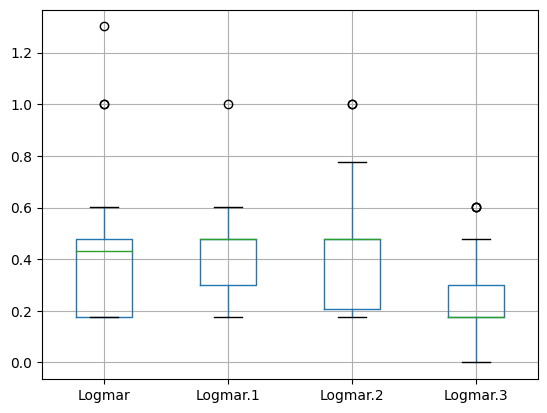

In [25]:
vision_dm.boxplot()

array([[<Axes: title={'center': 'Logmar'}>,
        <Axes: title={'center': 'Logmar.1'}>],
       [<Axes: title={'center': 'Logmar.2'}>,
        <Axes: title={'center': 'Logmar.3'}>]], dtype=object)

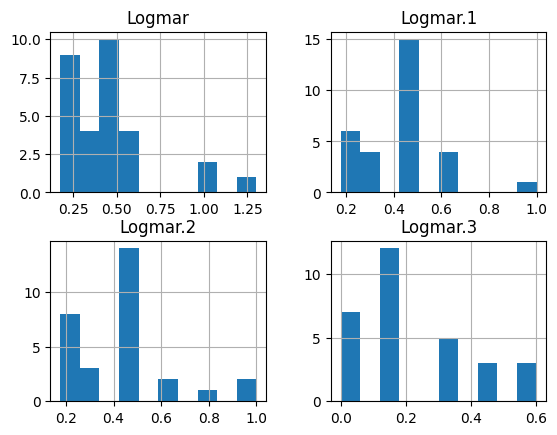

In [26]:
vision_dm.hist()

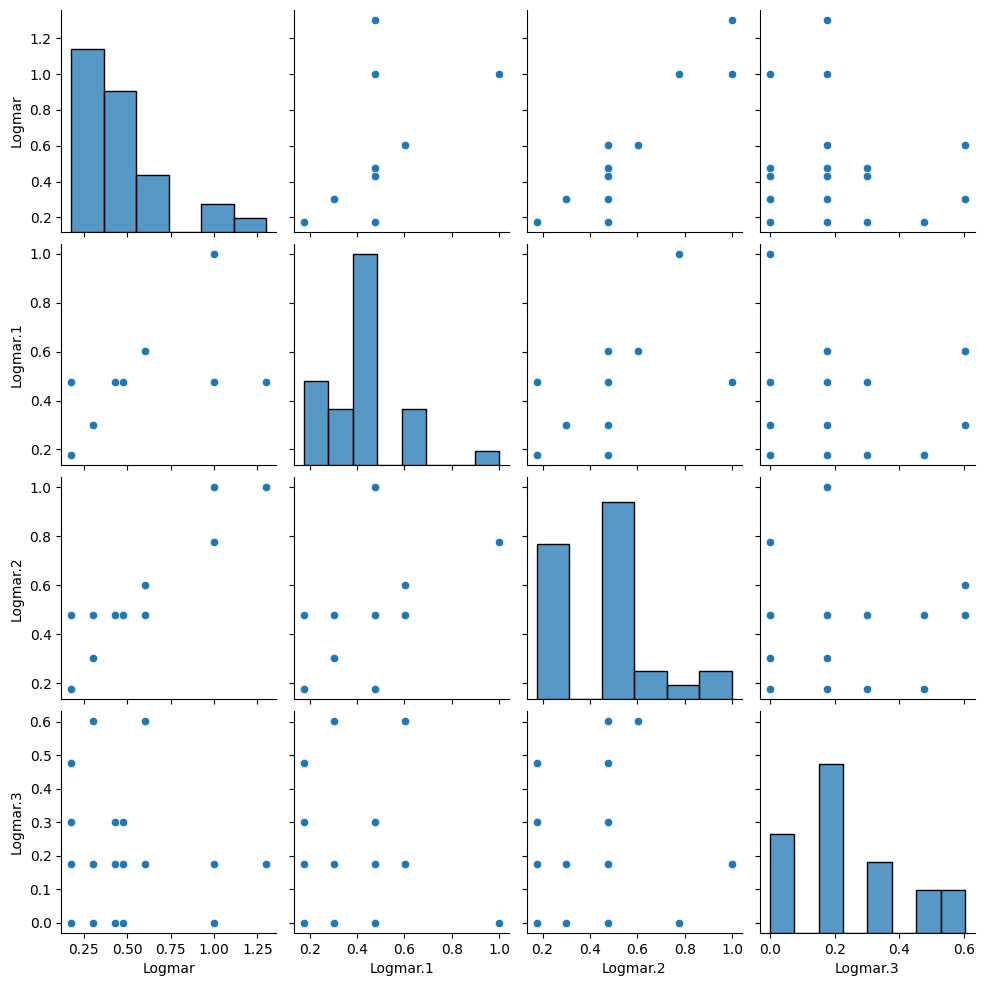

In [27]:
seaborn.pairplot(vision_dm)

<Axes: >

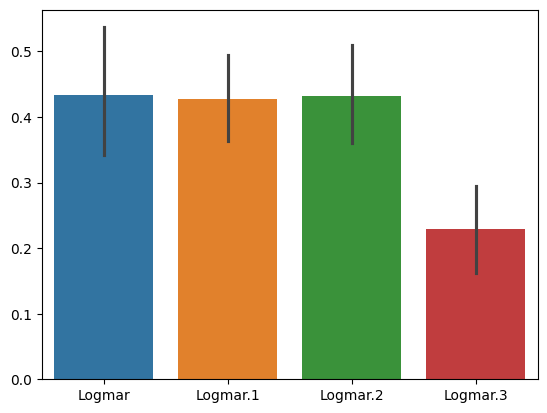

In [28]:
seaborn.barplot(vision_dm)

<Axes: >

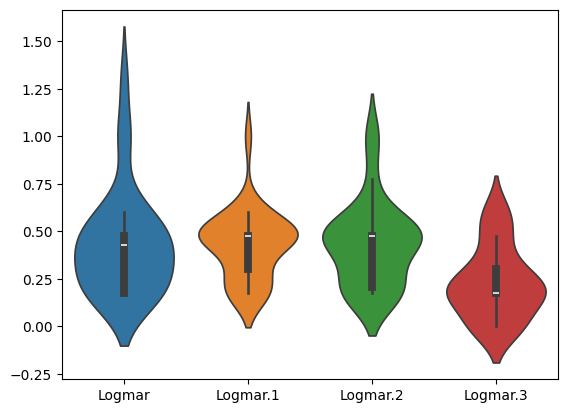

In [29]:
seaborn.violinplot(vision_dm)

<Axes: ylabel='count'>

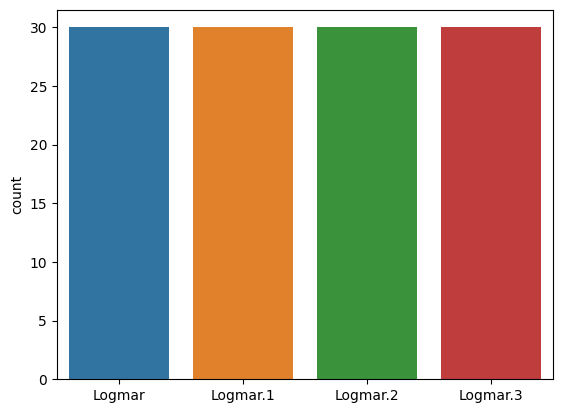

In [30]:
seaborn.countplot(vision_dm)

<Axes: >

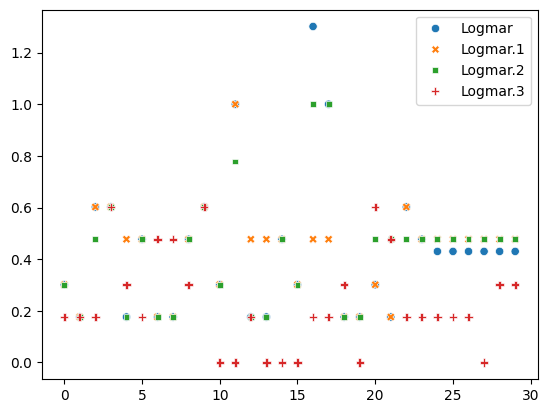

In [32]:
seaborn.scatterplot(vision_dm)

<Axes: >

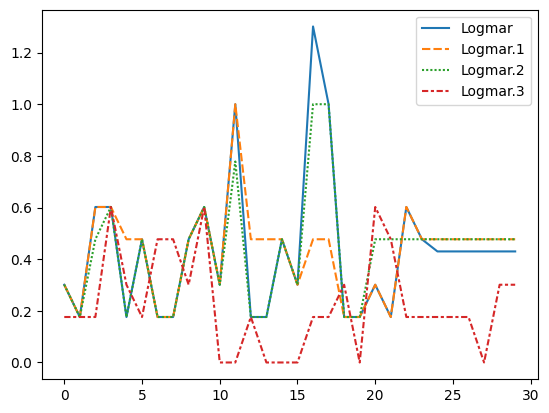

In [33]:
seaborn.lineplot(vision_dm)

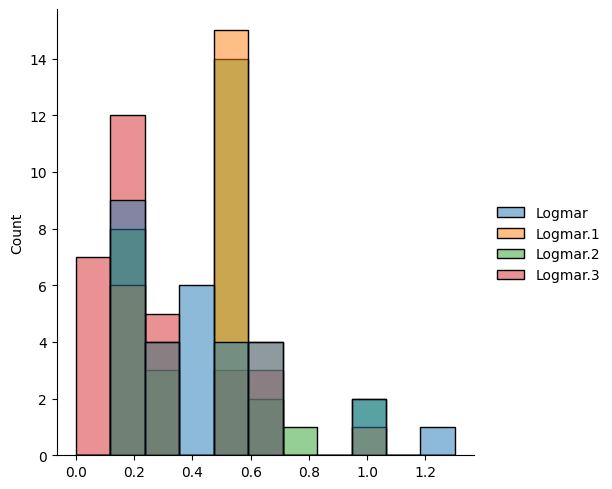

In [34]:
seaborn.displot(vision_dm)

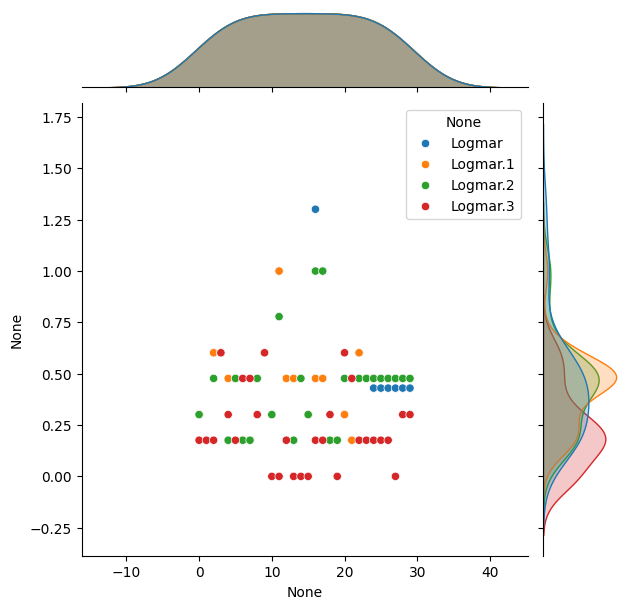

In [35]:
seaborn.jointplot(vision_dm)

<Axes: ylabel='Density'>

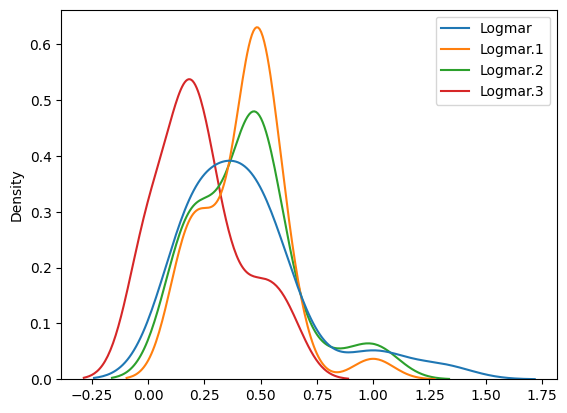

In [36]:
seaborn.kdeplot(vision_dm)

<ipython-input-38-1ba5423b70bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(vision_dm)


<Axes: ylabel='Density'>

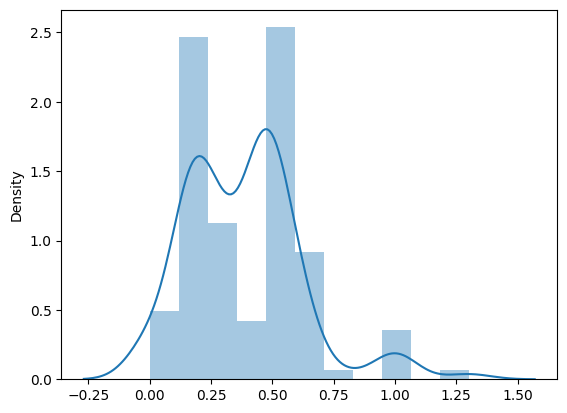

In [38]:
seaborn.distplot(vision_dm)

In [46]:
# prompt: T test for logMAR

from scipy import stats

# Assuming your 'Pre HD logMAR-DM' and 'Post HD 1 wk logMAR-DM' columns are in the DataFrame 'vision_dm'
pre_logMAR = vision_dm['Logmar']
post_logMAR = vision_dm['Logmar.1']

# Perform the t-test
t_statistic, p_value = stats.ttest_rel(pre_logMAR, post_logMAR)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 0.14232411645382628
P-value: 0.8878082125841922


In [48]:
pre_logMAR = vision_dm['Logmar']
post_logMAR = vision_dm['Logmar.2']

# Perform the t-test
t_statistic, p_value = stats.ttest_rel(pre_logMAR, post_logMAR)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.022941300639708142
P-value: 0.9818542253294467


In [50]:
pre_logMAR = vision_dm['Logmar']
post_logMAR = vision_dm['Logmar.3']

# Perform the t-test
t_statistic, p_value = stats.ttest_rel(pre_logMAR, post_logMAR)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.1955207884653425
P-value: 0.0033566205935783374


In [41]:
vision_dm.columns

Index(['Logmar', 'Logmar.1', 'Logmar.2', 'Logmar.3'], dtype='object')